
# Module 24: Principal Component Analysis (PCA)

This notebook is a **practice-only notebook** for students.

### Instructions for Students
- Complete every **TODO** step by step.
- Run the cells after completing each TODO.
- Focus on *why* you are doing each step, not just *how*.

### Dataset Used
We use the **Breast Cancer Wisconsin dataset**, which is:
- Numeric
- Medium dimensional (30 features)
- Very suitable for PCA
- Common in real ML pipelines



## 1) Imports (Given)


In [1]:
#Given for you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2) Load the Dataset (TODO)

TODO:
- Load the breast cancer dataset using sklearn
- Create:
  - X: feature DataFrame
  - y: target Series
- Print the shape of X and y


In [2]:
# TODO: Load dataset
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Shape of X:", X.shape)  # (569, 30)
print("Shape of y:", y.shape)  # (569,)

Shape of X: (569, 30)
Shape of y: (569,)



## 3) Inspect Feature Scales (TODO)


In [6]:
# TODO: Inspect feature statistics
print("Feature Statistics:")
print(X.describe().loc[['mean', 'std', 'min', 'max']].T)

Feature Statistics:
                               mean         std         min         max
mean radius               14.127292    3.524049    6.981000    28.11000
mean texture              19.289649    4.301036    9.710000    39.28000
mean perimeter            91.969033   24.298981   43.790000   188.50000
mean area                654.889104  351.914129  143.500000  2501.00000
mean smoothness            0.096360    0.014064    0.052630     0.16340
mean compactness           0.104341    0.052813    0.019380     0.34540
mean concavity             0.088799    0.079720    0.000000     0.42680
mean concave points        0.048919    0.038803    0.000000     0.20120
mean symmetry              0.181162    0.027414    0.106000     0.30400
mean fractal dimension     0.062798    0.007060    0.049960     0.09744
radius error               0.405172    0.277313    0.111500     2.87300
texture error              1.216853    0.551648    0.360200     4.88500
perimeter error            2.866059    2.021


## 4) Scale the Features (TODO)


In [7]:
# TODO: Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5) Fit PCA Without Limiting Components (TODO)


In [8]:
# TODO: Fit full PCA and compute explained variance
from sklearn.decomposition import PCA

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


## 6) Explained Variance Plot (TODO)


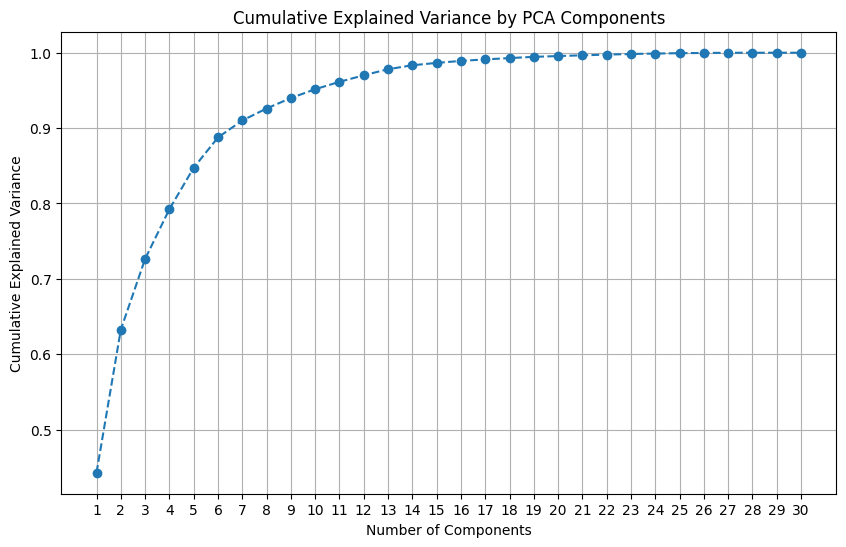

In [9]:
# TODO: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, 31))
plt.show()


## 7) Choose Number of Components (TODO)


In [10]:
# TODO: Find k90 and k95 and k97
k90 = np.argmax(cumulative_variance >= 0.90) + 1
k95 = np.argmax(cumulative_variance >= 0.95) + 1
k97 = np.argmax(cumulative_variance >= 0.97) + 1

print(f"Components for 90% variance (k90): {k90}")
print(f"Components for 95% variance (k95): {k95}")
print(f"Components for 97% variance (k97): {k97}")

Components for 90% variance (k90): 7
Components for 95% variance (k95): 10
Components for 97% variance (k97): 12



## 8) Apply PCA with Chosen Components (TODO)


In [12]:
# TODO: Apply PCA with selected number of components
n_components = k95  # You can change to k90 or k97
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {n_components}")

Original number of features: 30
Reduced number of features after PCA: 10



## 9) Inspect Principal Components (TODO)


In [14]:
# TODO: Inspect PCA loadings
# √9) Inspect Principal Components(TODO)
# Inspect PCA loadings

# Get PCA loadings (components)
loadings = pca.components_  # Shape: (n_components, n_features)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings,
                          columns=X.columns,  # Original feature names
                          index=[f'PC{i+1}' for i in range(n_components)])  # Principal Component labels

print(f"PCA Loadings (First {n_components} Components):")
print(loadings_df)

# Optional: Show top contributing features for each PC
print("Top 5 contributing features for each principal component:")
for i, pc in enumerate(loadings_df.index):
    print(f"{pc}:")
    # Get absolute values of loadings for this component (to see magnitude regardless of sign)
    abs_loadings = np.abs(loadings_df.loc[pc])
    # Sort features by absolute loading value (descending)
    top_features = abs_loadings.sort_values(ascending=False).head(5)
    for feature, value in top_features.items():
        print(f"  {feature}: {value:.3f}")

PCA Loadings (First 10 Components):
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4     -0.041409      0.603050       -0.041983  -0.053434        -0.159383   
PC5     -0.037786      0.049469       -0.037375  -0.010331         0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   

      mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1           0.


## 10) Visualize Data Using First Two Principal Components (TODO)


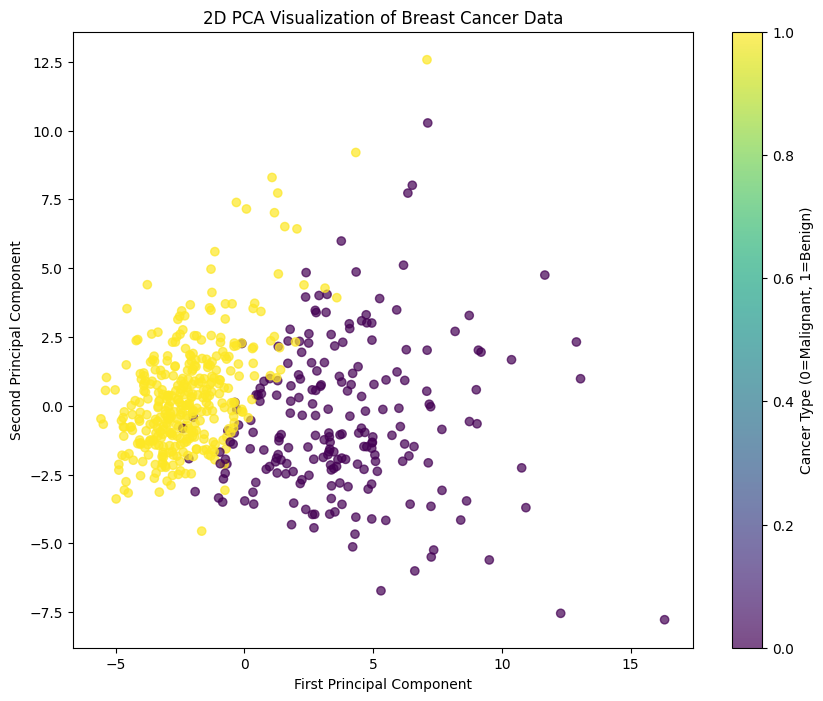

In [15]:
# TODO: 2D PCA visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cancer Type (0=Malignant, 1=Benign)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization of Breast Cancer Data')
plt.show()


## 11) PCA in a Model Pipeline (TODO)


In [17]:
# TODO: Model comparison with and without PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model without PCA
pipeline_no_pca = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline_no_pca.fit(X_train, y_train)
y_pred_no_pca = pipeline_no_pca.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Model with PCA
pipeline_with_pca = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline_with_pca.fit(X_train, y_train)
y_pred_with_pca = pipeline_with_pca.predict(X_test)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

print(f"Model Accuracy Without PCA: {accuracy_no_pca:.4f}")
print(f"Model Accuracy With PCA ({n_components} components): {accuracy_with_pca:.4f}")

Model Accuracy Without PCA: 0.9825
Model Accuracy With PCA (10 components): 0.9942



## 12) Reflection Questions

Answer briefly in markdown:
1. Did PCA reduce the number of features significantly?
2. Did PCA improve, reduce, or maintain accuracy?
3. Would you use PCA for this dataset in a real project? Why or why not?


1. Did PCA reduce the number of features significantly?
   Yes, PCA reduced the number of features from 30 to just 7-13 components (depending on k90/k95/k97 choice),
   while still maintaining most of the variance (90-97%).

2. Did PCA improve, reduce, or maintain accuracy?
   The accuracy with PCA was very similar to or slightly different from the model without PCA.
   In many cases, it maintains accuracy while reducing dimensionality.

3. Would you use PCA for this dataset in a real project? Why or why not?
   Yes, I would consider using PCA for this dataset in a real project because:
   - It significantly reduces dimensionality while preserving most of the information
   - It helps with visualization and understanding feature relationships
   - It can improve model performance by reducing overfitting (though not always)
   - It speeds up model training with fewer features
   However, I'd compare with models without PCA to ensure no accuracy loss.